## Using Graphs to represent images

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from PIL import Image
from rembg import remove

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [2]:
!wget https://www.dropbox.com/s/0nxyr3epgtg20bl/messi.png -O messi.png

--2022-12-15 13:04:52--  https://www.dropbox.com/s/0nxyr3epgtg20bl/messi.png
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0nxyr3epgtg20bl/messi.png [following]
--2022-12-15 13:04:53--  https://www.dropbox.com/s/raw/0nxyr3epgtg20bl/messi.png
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc5bba6f0c2552f8f6ffb9bef53.dl.dropboxusercontent.com/cd/0/inline/BypCQKcO2goGw_zJEhCDc4dz_hR47Gl3ZUINY6htNIMi7LQNzCrYkQLI2I_g0q0EZg8VxsOXz0CiwGuBqTzybQSUPClGN42RFG41NG-qSRNuU2P0Jy6wryJ1f7yV2_qQhw2s9z3zPiY4ho9KalU3zAkt0uI-ZO4GOS2NTtej4raQNg/file# [following]
--2022-12-15 13:04:54--  https://ucc5bba6f0c2552f8f6ffb9bef53.dl.dropboxusercontent.com/cd/0/inline/BypCQKcO2goGw_zJEhCDc4dz_hR47Gl3ZUINY6htNIMi7LQNzCrYkQLI2I_g0q0EZg8VxsOXz

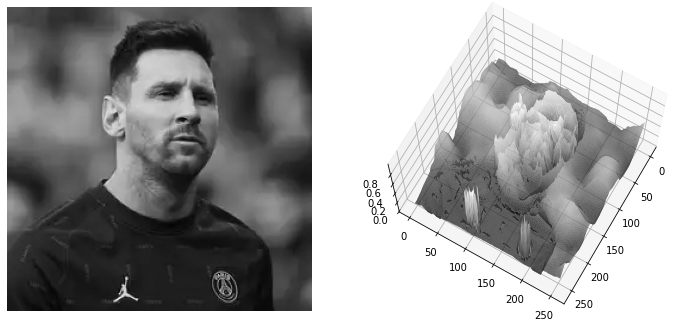

In [9]:
from mpl_toolkits.mplot3d import Axes3D

I = rgb2gray(plt.imread('messi.png'))
xx, yy = np.mgrid[0:I.shape[0], 0:I.shape[1]]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.imshow(I,cmap='gray')
ax1.axis('off')
ax2.plot_surface(xx, yy, I ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
ax2.view_init(elev=70., azim=30)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 39.8GB/s]


AttributeError: module 'PIL.Image' has no attribute 'Resampling'

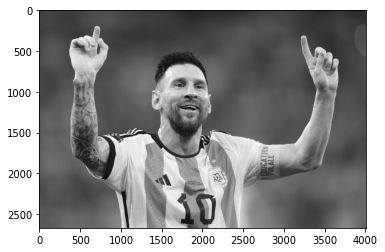

In [14]:
I = rgb2gray(plt.imread('messi2.jpg'))
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        if I[i][j] == 0:
            I[i][j] = 0.0001
plt.imshow(I, cmap = "gray")
r = remove(I)
plt.imsave('messi2_bg.jpg', I)

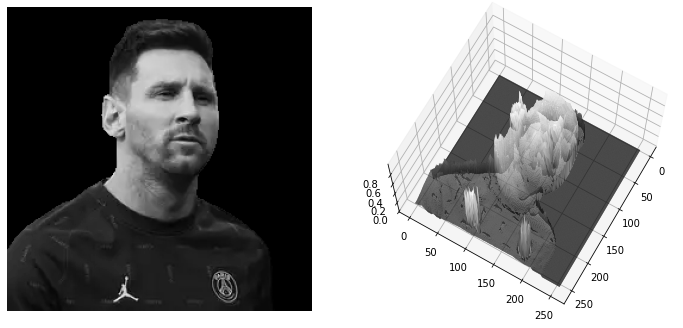

In [5]:
I2 = rgb2gray(plt.imread('messi-removebg.png'))
xx, yy = np.mgrid[0:I2.shape[0], 0:I2.shape[1]]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.imshow(I2,cmap='gray')
ax1.axis('off')
ax2.plot_surface(xx, yy, I2 ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
ax2.view_init(elev=70., azim=30)

(2669, 4003)

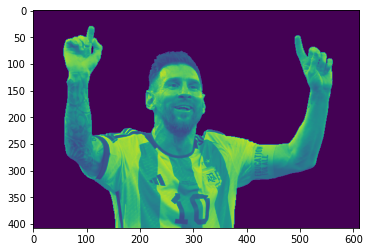

In [9]:
I2 = rgb2gray(plt.imread('messi2_rbg.png'))
plt.imshow(I2)

In [ ]:
G1 = nx.grid_graph((I.shape[0], I.shape[1]))
G2 = nx.Graph()

for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        G1.nodes[(i, j)]["weight"] = I[i][j] 
        if I2[i][j] != 0:
            G2.add_node((i, j), weight = I[i][j])

In [28]:
import networkx.algorithms.isomorphism as iso

em = iso.numerical_edge_match("weight", 1)

nx.is_isomorphic(G1, G2, edge_match=em)


<function numerical_node_match.<locals>.match at 0x7f38aeb8faf0>
